In [6]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np
import matplotlib.pyplot as plt

# Number of rows to read from the parquet file
rows_to_read = 100000
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# Convert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

# Get information about the dataframe
print(df.isna().sum())

hvfhs_license_num           0
dispatching_base_num        0
originating_base_num    28030
request_datetime            0
on_scene_datetime       28030
pickup_datetime             0
dropoff_datetime            0
PULocationID                0
DOLocationID                0
trip_miles                  0
trip_time                   0
base_passenger_fare         0
tolls                       0
bcf                         0
sales_tax                   0
congestion_surcharge        0
airport_fee                 0
tips                        0
driver_pay                  0
shared_request_flag         0
shared_match_flag           0
access_a_ride_flag          0
wav_request_flag            0
wav_match_flag              0
dtype: int64


In [2]:
print(df.columns)

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')


In [3]:
print(df.describe())

                 request_datetime           on_scene_datetime  \
count                        1000                         784   
mean   2023-01-01 00:25:05.447000  2023-01-01 00:31:29.102040   
min           2022-12-31 23:53:53         2022-12-31 23:58:17   
25%    2023-01-01 00:13:22.750000         2023-01-01 00:17:26   
50%    2023-01-01 00:24:03.500000         2023-01-01 00:31:30   
75%    2023-01-01 00:36:58.250000         2023-01-01 00:45:54   
max           2023-01-01 01:00:00         2023-01-01 00:59:52   
std                           NaN                         NaN   

                  pickup_datetime            dropoff_datetime  PULocationID  \
count                        1000                        1000   1000.000000   
mean   2023-01-01 00:32:29.108000  2023-01-01 00:50:37.701000    142.646000   
min           2023-01-01 00:00:11         2023-01-01 00:04:10      4.000000   
25%    2023-01-01 00:18:52.750000  2023-01-01 00:35:10.750000     79.000000   
50%    2023-01-01 0

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   hvfhs_license_num     1000 non-null   object        
 1   dispatching_base_num  1000 non-null   object        
 2   originating_base_num  784 non-null    object        
 3   request_datetime      1000 non-null   datetime64[us]
 4   on_scene_datetime     784 non-null    datetime64[us]
 5   pickup_datetime       1000 non-null   datetime64[us]
 6   dropoff_datetime      1000 non-null   datetime64[us]
 7   PULocationID          1000 non-null   int64         
 8   DOLocationID          1000 non-null   int64         
 9   trip_miles            1000 non-null   float64       
 10  trip_time             1000 non-null   int64         
 11  base_passenger_fare   1000 non-null   float64       
 12  tolls                 1000 non-null   float64       
 13  bcf                

In [5]:
df.count()

hvfhs_license_num       1000
dispatching_base_num    1000
originating_base_num     784
request_datetime        1000
on_scene_datetime        784
pickup_datetime         1000
dropoff_datetime        1000
PULocationID            1000
DOLocationID            1000
trip_miles              1000
trip_time               1000
base_passenger_fare     1000
tolls                   1000
bcf                     1000
sales_tax               1000
congestion_surcharge    1000
airport_fee             1000
tips                    1000
driver_pay              1000
shared_request_flag     1000
shared_match_flag       1000
access_a_ride_flag      1000
wav_request_flag        1000
wav_match_flag          1000
dtype: int64

In [5]:
df['on_scene_datetime'].value_counts()

on_scene_datetime
2023-01-01 01:49:42    27
2023-01-01 01:37:57    23
2023-01-01 00:42:21    23
2023-01-01 00:35:19    23
2023-01-01 01:46:15    23
                       ..
2023-01-01 00:00:05     1
2022-12-31 23:58:39     1
2022-12-31 23:59:23     1
2022-12-31 23:58:06     1
2023-01-01 01:59:27     1
Name: count, Length: 7288, dtype: int64

In [6]:
print(df['request_datetime'].min())
print(df['request_datetime'].max())

2022-12-31 20:30:00
2023-01-01 02:15:00


In [7]:
print(df['on_scene_datetime'].min())
print(df['on_scene_datetime'].max())

2022-12-31 21:23:03
2023-01-01 01:59:59


In [8]:
print(df['pickup_datetime'].min())
print(df['pickup_datetime'].max())

2023-01-01 00:00:00
2023-01-01 01:59:59


In [9]:
print(df['dropoff_datetime'].min())
print(df['dropoff_datetime'].max())

2023-01-01 00:02:27
2023-01-01 03:46:34


In [14]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np

# Number of rows to read from the parquet file
rows_to_read = 100000
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# CConvert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

print(df['wav_request_flag'].count())
print(df['wav_request_flag'])

100000
0        N
1        N
2        N
3        N
4        N
        ..
99995    N
99996    N
99997    N
99998    N
99999    N
Name: wav_request_flag, Length: 100000, dtype: object


In [8]:
df['tips']

0        5.22
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
99995    0.00
99996    0.00
99997    0.00
99998    1.00
99999    0.00
Name: tips, Length: 100000, dtype: float64

In [8]:
print(f"Average tip: {df['tips'].mean():.2f}")
print(f"Min tip: {df['tips'].min():.2f}")
print(f"Max tip: {df['tips'].max():.2f}")

Average tip: 1.26
Min tip: 0.00
Max tip: 98.00


In [3]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np
import matplotlib.pyplot as plt

# Number of rows to read from the parquet file
rows_to_read = 100
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# CConvert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

print(df.values)

[['HV0003' 'B03404' 'B03404' ... ' ' 'N' 'N']
 ['HV0003' 'B03404' 'B03404' ... ' ' 'N' 'N']
 ['HV0003' 'B03404' 'B03404' ... ' ' 'N' 'N']
 ...
 ['HV0005' 'B03406' None ... 'N' 'N' 'N']
 ['HV0005' 'B03406' None ... 'N' 'N' 'N']
 ['HV0003' 'B03404' 'B03404' ... ' ' 'N' 'N']]


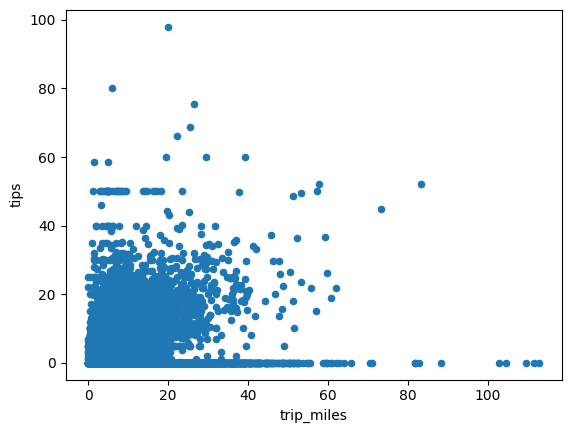

In [7]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np
import matplotlib.pyplot as plt

# Number of rows to read from the parquet file
rows_to_read = 100000
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# CConvert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()

df.plot(kind='scatter', x='trip_miles', y='tips')

plt.show()

In [ ]:
# Import the various modules we need
import pandas as pd
from pyarrow.parquet import ParquetFile
import pyarrow as pa
import numpy as np
import matplotlib.pyplot as plt

# Number of rows to read from the parquet file
rows_to_read = 100000
# The file name to read
parquet_file_name = "fhvhv_tripdata_2023-01.parquet"
# Set up a pointer to the Parquet file
pf = ParquetFile(parquet_file_name)
# Take a subset of the rows from the file
rows_subset = next(pf.iter_batches(batch_size = rows_to_read))
# CConvert data to a Pandas dataframe
df = pa.Table.from_batches([rows_subset]).to_pandas()


print(len(df[(df['shared_request_flag'] == 'Y') & (df['shared_request_flag'] == 'N')]))